https://www.reddit.com/dev/api/,www.finance.yahoo.com

## Propose a project

In [14]:
import praw

reddit = praw.Reddit(client_id=clientid,
                     client_secret= secret, password=password,
                     user_agent='agent', username=developers)

In [39]:
subreddit = reddit.subreddit('technology')

hot_python = subreddit.hot(limit = 3)

for submission in hot_python:
    print(submission.title)

Any form of threatening, harassing, or violence / physical harm towards anyone will result in a ban
Got a tech question or want to discuss tech? Weekly /r/Technology Tech Support / General Discussion Thread
IT'S OFFICIAL: IBM is acquiring software company Red Hat for $34 billion


In [30]:
for i in subreddit.search("AMD", limit=2):
    title = i.title
    subid = i.id
    print title
    print subid

Trump's tariffs on Chinese goods to affect some AMD and Nvidia gaming graphics cards
9jdami
AMD will surpass Intel on CPU performance next year, says leading tech analysts
9g42q1


In [31]:
submission = reddit.submission(id='9jdami')

In [32]:
for top_level_comment in submission.comments:
    print(top_level_comment.body)

Pretty soon they are gonna need to start storing unsold graphics cards inside of Fort Knox based on their pricing rise.
Would this impact existing products? I was considering picking up a 1080ti after the 2080ti has been down for a while but don't want it to cost more than it does now.
The reason why the 2080ti is  priced at 1000 finally made clear.
We live in a society.
Or they can always make it in a non-tariff country.
Nah they just need to engage contract manufacturers in Taiwan or elsewhere.  Or ship parts from China and assemble in Malaysia, or..... so many other ways to get around the tarriff. 
As the prices of all consumer goods rise, retailers need to start putting big bold stickers on products that cost way more "Price increase due to Donald Trump's trade tariffs."
God damn it, I need an upgrade for my graphics card. Sucks using a 960 still :c
Imma get that geforce graphics card before the end of this year!
They should just "bundle" the cards in cheap towers or cases. 
Would 

In [37]:
from praw.models import MoreComments

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

Pretty soon they are gonna need to start storing unsold graphics cards inside of Fort Knox based on their pricing rise.
Would this impact existing products? I was considering picking up a 1080ti after the 2080ti has been down for a while but don't want it to cost more than it does now.
The reason why the 2080ti is  priced at 1000 finally made clear.
We live in a society.
Or they can always make it in a non-tariff country.
Nah they just need to engage contract manufacturers in Taiwan or elsewhere.  Or ship parts from China and assemble in Malaysia, or..... so many other ways to get around the tarriff. 
As the prices of all consumer goods rise, retailers need to start putting big bold stickers on products that cost way more "Price increase due to Donald Trump's trade tariffs."
God damn it, I need an upgrade for my graphics card. Sucks using a 960 still :c
Imma get that geforce graphics card before the end of this year!
They should just "bundle" the cards in cheap towers or cases. 
Would 

In [33]:
import sys

sys.getsizeof(top_level_comment.body)

224

In [17]:
for submission in hot_python:
    if not submission.stickied:
        print('Title: {}, ups: {}, downs: {}, Have we visited?: {}'.format(submission.title,
                                                                           submission.ups,
                                                                           submission.downs,
                                                                           submission.visited))

In [ ]:
quandlkey = 'kwpSd-EtzUzRsN4QVzYP'

In [ ]:
stock = 'AAPL'
link = 'https://www.quandl.com/api/v3/datasets/EOD/'+stock+'.csv?api_key='+quandlkey

In [45]:
import quandl

sys.getsizeof(quandl.get("EIA/PET_RWTC_D"))


132608

In [54]:
import pandas as pd

amd = pd.read_csv('stock/AMD.csv')

In [58]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-30,19.400000,20.180000,19.309999,19.420000,19.420000,160823400
1,2018-07-31,19.350000,19.500000,18.270000,18.330000,18.330000,118403400
2,2018-08-01,18.340000,18.950001,18.320000,18.480000,18.480000,75495200
3,2018-08-02,18.170000,18.830000,18.000000,18.790001,18.790001,52867100
4,2018-08-03,18.940001,19.059999,18.370001,18.490000,18.490000,53232100


In [57]:
amd['Date'] = pd.to_datetime(amd['Date'])

In [61]:
amd_series = pd.Series(amd['Close'], index=amd['Date'])

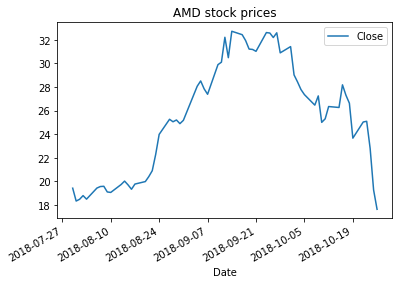

In [137]:
%matplotlib inline

amd.plot(x='Date', y='Close', title='AMD stock prices')


In [114]:
from datetime import datetime, timedelta
import unicodedata

df = pd.DataFrame(columns=['date', 'id', 'title', 'comments'])

for i in subreddit.search("AMD",time_filter='year'):
    title = i.title
    subid = i.id
    sec = i.created_utc
    #print title
    #print subid
    #print sec
    utc_date = datetime(1970, 1, 1, 0, 0, 0)
    date =  utc_date+ timedelta(seconds=sec)
    i.comment_sort = 'top'
    #comments = i.comments.list()
    #print date
    
    #print comments
    
    all_comments =''
    for top_level_comment in i.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        comment = top_level_comment.body
        #print comment
        comment_str = unicodedata.normalize('NFKD', comment).encode('ascii','ignore')
        
        all_comments += ' '+ comment_str
        #print all_comments
    
    
    df = df.append({'date': date, 'id': subid, 'title':title, 'comments': all_comments}, ignore_index=True)


In [115]:
sys.getsizeof(df)

162620

In [128]:
df_recent = df[df['date'] > datetime(2018,7,30)]

In [127]:
#import io
#import codecs
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


#analyser = SentimentIntensityAnalyzer()

#def sentiment_analyzer_scores(sentence):
 #   score = analyser.polarity_scores(sentence)
  #  print("{:-<40} {}".format(sentence, str(score)))


In [126]:
from textblob import TextBlob
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun! I love it! It's awesome.")
print testimonial.sentiment
print testimonial.sentiment[0]

Sentiment(polarity=0.5599999999999999, subjectivity=0.5814285714285714)

In [133]:
df['polarity'] = df_recent['comments'].apply(lambda x: TextBlob(x).sentiment[0])

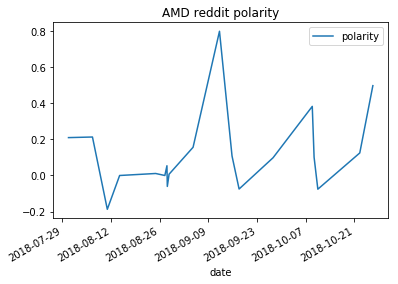

In [138]:
df.plot(x='date', y = 'polarity', title ='AMD reddit polarity')